In [ ]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('movies_cleaned.csv')

In [3]:
report=ProfileReport(df, title="EDA")
report.to_file("movies_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 166.51it/s]


### Line Plot --> Average Rating v/s Year

How movie ratings have changed over time.

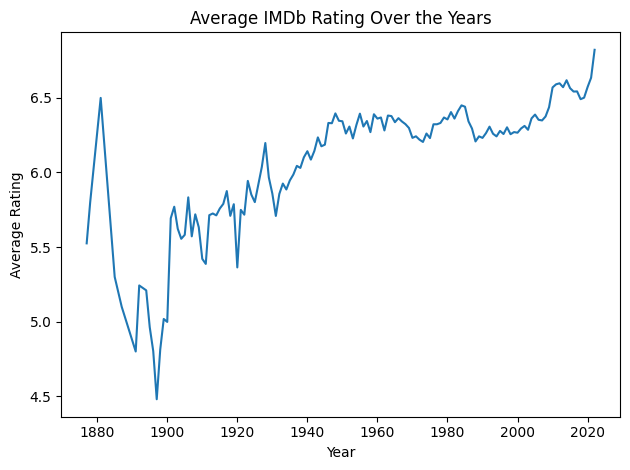

In [4]:
ratings_by_year = df.groupby('Year_of_Release')['Rating'].mean().reset_index()
sns.lineplot(data=ratings_by_year, x='Year_of_Release', y='Rating')
plt.title('Average IMDb Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

### Line Plot --> Average Duration v/s Year

Changes in average movie length over time.

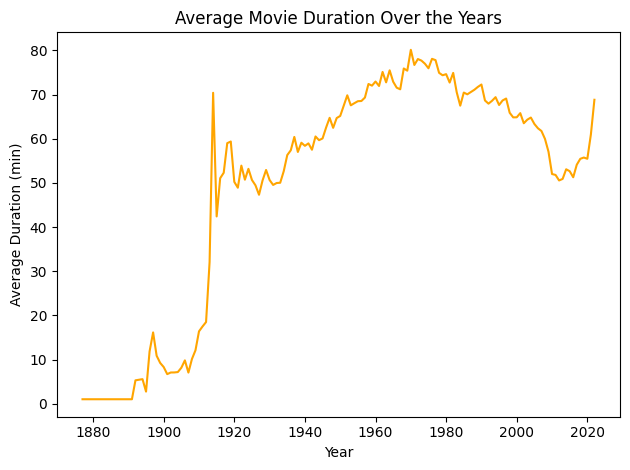

In [5]:
duration_by_year = df.groupby('Year_of_Release')['Duration_min'].mean().reset_index()
sns.lineplot(data=duration_by_year, x='Year_of_Release', y='Duration_min', color='orange')
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (min)')
plt.tight_layout()
plt.show()

### Bar Plot --> Number of Movies v/s Genre

Helps understand the dominant film types in the dataset.

In [6]:
import ast
df['Genre']=df['Genre'].apply(ast.literal_eval)

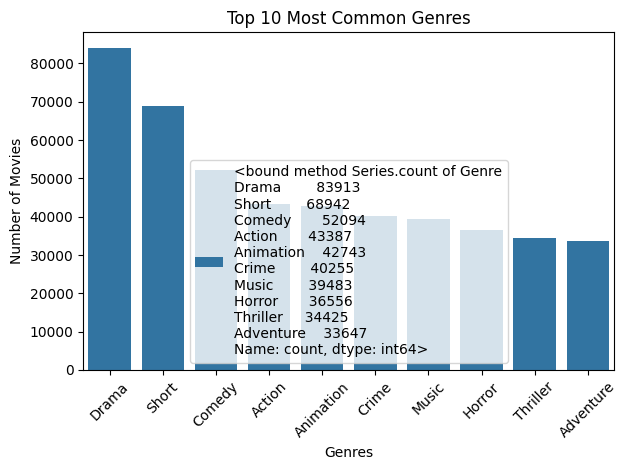

In [7]:
df_exploded = df.explode('Genre')
top_genres = df_exploded['Genre'].value_counts().head(10)
sns.barplot(y=top_genres.values, x=top_genres.index, hue=top_genres.count)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Box Plot --> Rating v/s Genre

Tells which genres are more consistent or polarizing in terms of quality.

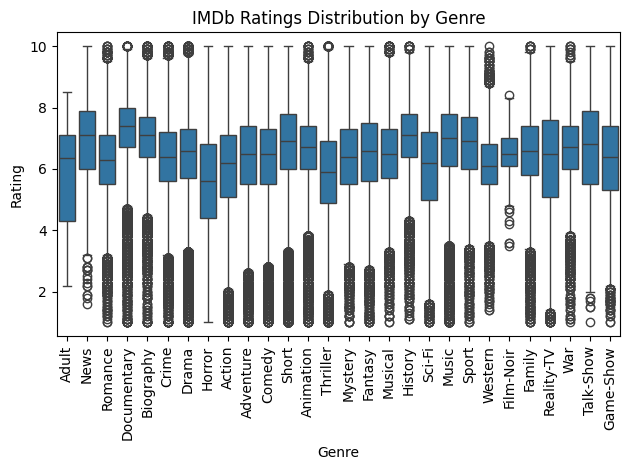

In [8]:
sns.boxplot(data=df_exploded, x='Genre', y='Rating')
plt.xticks(rotation=90)
plt.title('IMDb Ratings Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

### Bar Plot --> Number of Movies v/s Director

Who directed the most movies in the dataset.

In [9]:
df['Directors_Name']=df['Directors_Name'].str.split(',')

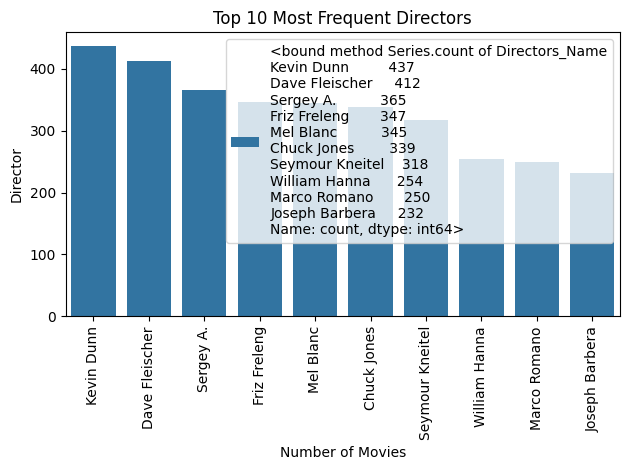

In [10]:
director_name_exploded = df.explode('Directors_Name')
director_name_exploded['Directors_Name'] = director_name_exploded['Directors_Name'].replace('nm0000000', np.nan)
top_directors = director_name_exploded['Directors_Name'].value_counts().head(10)
sns.barplot(y=top_directors.values, x=top_directors.index, hue=top_directors.count)
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Bar Plot --> Number of Movies v/s Actors

Which actors appear most in dataset.

In [11]:
df['Actor_list']=df['Actor_list'].apply(ast.literal_eval)

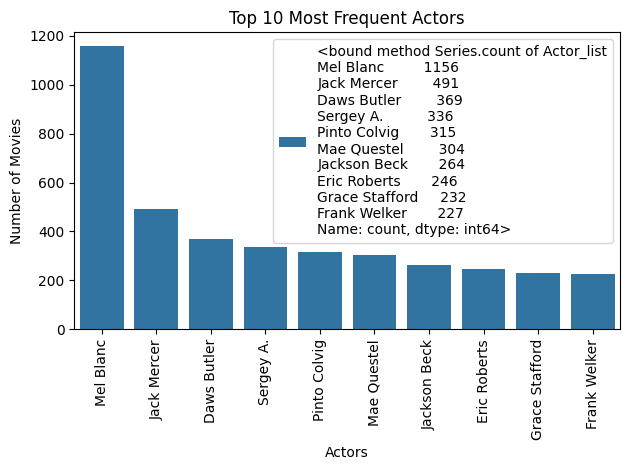

In [12]:
df_exploded_actors = df.explode('Actor_list')
df_exploded_actors['Actor_list'] = df_exploded_actors['Actor_list'].replace('nm0000000', np.nan)
top_actors = df_exploded_actors['Actor_list'].value_counts().head(10)
sns.barplot(y=top_actors.values, x=top_actors.index, hue=top_actors.count)
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()